In [1]:
import sympy as sp
from sympy import *
import numpy as np
import math
from statistics import *
import matplotlib.pyplot as plt   
from matplotlib.pyplot import *

In [2]:
# Question 1

# i)
_lambda = 0.1 # per week
_mu = 2.5 * 52 # every 2.5 years there is a clear out event
h = 0.2 # time step of 0.2 weeks
N = 20 # number of simulations
end = 10 * 52 # 10 years
p = 0 # population starts at 0
timesteps = int(end / h)


print(f"_lambda: {_lambda} _mu: {_mu} end: {end} in weeks | timesteps: {timesteps}")

_lambda: 0.1 _mu: 130.0 end: 520 in weeks | timesteps: 2600


In [3]:
realisations = []

i = 0

for i in range(N):

    realisations.append([])
    
    for j in range(timesteps):

    #     Arrivals
        if np.random.uniform(0,1) < _lambda * h:
            p += 1

        if np.random.uniform(0,1) < 1 / _mu * h :
            p = 0

        realisations[i].append(p)

data_visualisation = []
# len(realisations)
for i in range(len(realisations[0])):
    x = 0
    for j in range(N):
#         print(f"i:{i} j:{j} {realisations[j][i]}")
        x += realisations[j][i]
    
#     print(f"Expected population at {(i+1)*10} seconds: {x/N}")
    data_visualisation.append(x/N)

In [4]:
# realisations
len(realisations)

20

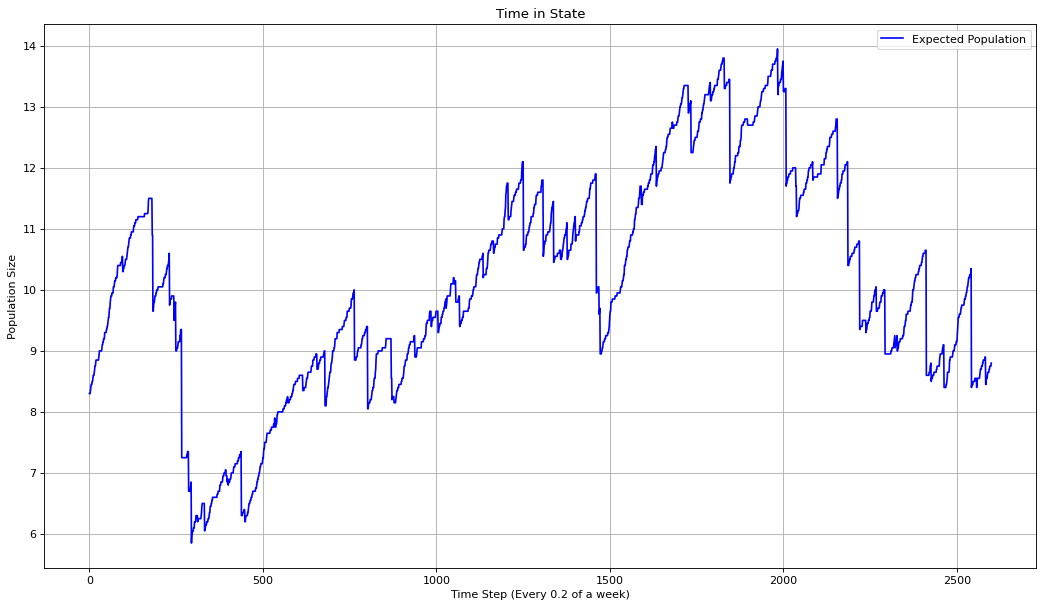

In [5]:
timeline = []
for i in range(len(data_visualisation)):
# for i in range(len(realisations[0])):
    timeline.append(i)

figure(figsize=(16, 9), dpi=80)

x = timeline
y1 = data_visualisation
# y1 = realisations[0]

plt.plot(x,y1, color='b', label='Expected Population')

# Turn a grid on.
plt.grid()

# Title the plot.
plt.title('Time in State')


# Label axes
plt.xlabel('Time Step (Every 0.2 of a week)')
plt.ylabel('Population Size')

# Make the plot have a legend based on the data 'labels'
plt.legend()

In [6]:
# ii)

def expected_population(t):
    _lambda = 0.1 # per week
    _mu = 2.5 * 52 # every 2.5 years there is a clear out event
    return _lambda / (1/_mu) * ( 1 - math.exp(-(1/_mu) * t) )

data_visualisation = []
timeline = []
for i in range(end):
#     print(i)
    timeline.append(i)
    data_visualisation.append(expected_population(i))
    

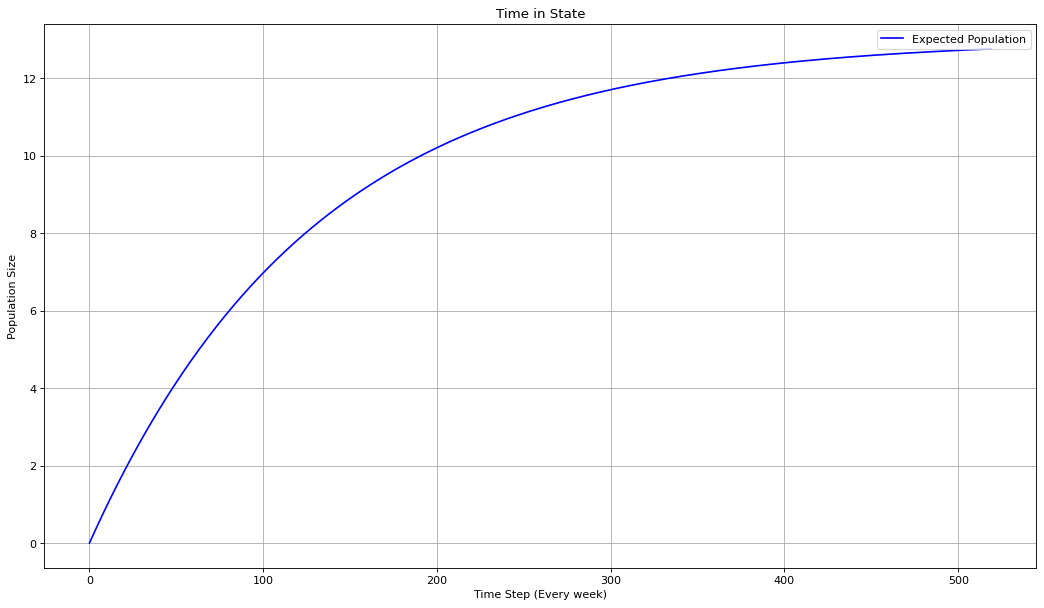

In [7]:
figure(figsize=(16, 9), dpi=80)

x = timeline
y1 = data_visualisation
# y1 = realisations[0]

plt.plot(x,y1, color='b', label='Expected Population')

# Turn a grid on.
plt.grid()

# Title the plot.
plt.title('Time in State')


# Label axes
plt.xlabel('Time Step (Every week)')
plt.ylabel('Population Size')

# Make the plot have a legend based on the data 'labels'
plt.legend()

In [8]:
# Question 2

# Example giving for Lab 6

delta_t = 0.01
timesteps = round(10 * (1/ delta_t ))

sims = 25
state_history = []
for i in range(sims):
    
    state = 0
    
    mu_s = [False, 1, 3, 2, 1]
    lam_s = 10
    state_history.append([])
    for t in range(timesteps):
        if(np.random.uniform(0,1) < lam_s * delta_t):
            if(state < 4):
                state+=1
        if(mu_s[state]):
            if(np.random.uniform(0,1) < mu_s[state] * delta_t):
                state -=1 
        state_history[i].append(state)
        
#         prob_of_1 = [0]*timesteps
prob_of_1 = [0]*timesteps
for i in range(sims):
    
    for j in range(timesteps):
        
        if(state_history[i][j] == 1):
            
            prob_of_1[j] += 1 / sims

mx_timestep = 0
for i in range(timesteps):
    if(prob_of_1[i] > prob_of_1[mx_timestep]):
        mx_timestep = i
print("The time at which the probability of being in state 1 is the largest:\n", mx_timestep*delta_t, "seconds")

The time at which the probability of being in state 1 is the largest:
 0.07 seconds


In [ ]:
# ii) Didn't get it done
from sympy import Matrix, Symbol, init_printing
init_printing()

mu_s = [0, 1, 3, 2, 1]
lam_s = 10



x1 = Symbol('x_1')
x2 = Symbol('x_2')

M = Matrix([
    [-lam_s, mu_s[0], 0, 0, 0],
    [lam_s, -(lam_s + mu_s[1]), mu_s[1], 0, 0],
    [0, lam_s, -(lam_s + mu_s[2]), mu_s[2], 0],
    [0, 0, lam_s, -(lam_s + mu_s[3]), mu_s[3]],
    [0, 0, 0, lam_s, -mu_s[4]]
])
print("Transition Matrix")
display(M)
print("Eigenvalues")
display(M.eigenvals())
print("Eigenvectors")
display(M.eigenvects())